In [1]:
#===== pandas =====
import pandas as pd
pd.set_option("display.max_columns",None)


#===== Numpy =====
import numpy as np

#===== Visualization =====
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

#==== parse and KNN ====
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

#===== Function =====
def missing(df):
    missing = df.isnull().sum()
    percent = 100*(missing/len(df))
    dtypes_ = df.dtypes
    nunique = df.nunique()
    return pd.DataFrame({"missing":missing,
                        "percent":percent,
                        "dtypes":dtypes_,
                        "n_unique":nunique}).sort_values(by="percent",ascending=False)


import warnings
warnings.filterwarnings("ignore")

# Load Dataset

## Ebook

In [2]:
df_book = pd.read_csv("BX-Books.csv",error_bad_lines=False,encoding='latin-1',sep=";")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [3]:
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
df_book[df_book.duplicated(subset=["ISBN"])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [5]:
missing(df_book)

,missing,percent,dtypes,n_unique
Image-URL-L,3,0.001106,object,271041
Publisher,2,0.000737,object,16807
Book-Author,1,0.000369,object,102023
ISBN,0,0.000000,object,271360
Book-Title,0,0.000000,object,242135
Year-Of-Publication,0,0.000000,object,202
Image-URL-S,0,0.000000,object,271044
Image-URL-M,0,0.000000,object,271044


In [6]:
df_book.columns = [x.replace("-","_").lower() for x in df_book.columns]

In [7]:
df_book.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
df_book.shape

(271360, 8)

In [9]:
df_book.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'image_url_s', 'image_url_m', 'image_url_l'],
      dtype='object')

In [10]:
df_books = df_book.loc[:,["isbn","book_title","book_author","year_of_publication","publisher","image_url_l"]]

In [11]:
df_books = df_books.rename(columns={"book_title":"title",
                                   "book_author":"author",
                                   "year_of_publication":"year",
                                   "image_url_l":"url_l"})


df_books.head()

,isbn,title,author,year,publisher,url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


## Ratings

In [12]:
df_rating = pd.read_csv("BX-Book-Ratings.csv",error_bad_lines=False,encoding='latin-1',sep=";")

In [13]:
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
df_rating.columns = [x.replace("-","_").lower() for x in df_rating.columns]


df_rating.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
missing(df_rating)

,missing,percent,dtypes,n_unique
user_id,0,0.0,int64,105283
isbn,0,0.0,object,340556
book_rating,0,0.0,int64,11


In [16]:
df_rating = df_rating.rename(columns={"book_rating":"rating"})

df_rating.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
df_rating.shape

(1149780, 3)

## User

In [18]:
df_user = pd.read_csv("BX-Users.csv",error_bad_lines=False,encoding='latin-1',sep=";")

In [19]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [20]:
df_user.columns = [x.replace("-","_").lower() for x in df_user.columns]


df_user.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
missing(df_user)

,missing,percent,dtypes,n_unique
age,110762,39.719857,float64,165
user_id,0,0.000000,int64,278858
location,0,0.000000,object,57339


In [22]:
df_user.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
state = df_user.location.str.split(",", expand = True)

state = state.rename(columns = {0:"city",
                               1:"provence",
                               2:"country"})

state.head()

,city,provence,country,3,4,5,6,7,8
0,nyc,new york,usa,None,None,None,None,None,None
1,stockton,california,usa,None,None,None,None,None,None
2,moscow,yukon territory,russia,None,None,None,None,None,None
3,porto,v.n.gaia,portugal,None,None,None,None,None,None
4,farnborough,hants,united kingdom,None,None,None,None,None,None


In [24]:
df_user["city"] = state.city
df_user["provence"] = state.provence
df_user["country"] = state.country

df_user.drop("location",axis=1,inplace=True)

In [25]:
df_user.head()

,user_id,age,city,provence,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


<AxesSubplot: xlabel='age', ylabel='Count'>

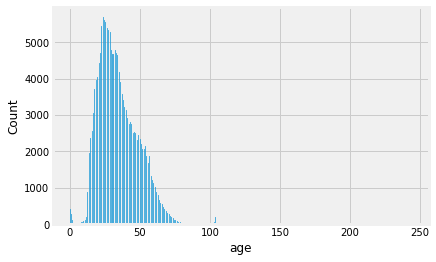

In [26]:
sns.histplot(df_user.age)

In [27]:
df_user[df_user.age > 100]

,user_id,age,city,provence,country
1288,1289,103.0,san jose,california,usa
1322,1323,104.0,milano,lombardia,italy
1578,1579,231.0,akure,ondo/nigeria,nigeria
3084,3085,104.0,zürich,switzerland,switzerland
3210,3211,119.0,le mesnil saint denis,yvelines,france
...,...,...,...,...,...
276047,276048,127.0,wien,wien,austria
276352,276353,104.0,hillsdale,new york,usa
277107,277108,104.0,quinto,ticino,switzerland
277503,277504,103.0,san diego,california,usa


In [28]:
df_user.shape

(278858, 5)

## Join Data

In [29]:
#filter user_id who have value counts >= 100
x = df_rating["user_id"].value_counts() >=200

y = x[x].index

In [30]:
df_rating_clean = df_rating[df_rating["user_id"].isin(y)]

In [31]:
#join rating with ebook
df_rating_ebook = df_rating_clean.merge(df_books,on="isbn")

df_rating_ebook.head()

,user_id,isbn,rating,title,author,year,publisher,url_l
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [32]:
#calculating how many times books gived ratings
num_rating = df_rating_ebook.groupby("title")["rating"].count().sort_values(ascending=False).reset_index()

num_rating.head()

,title,rating
0,Wild Animus,365
1,Bridget Jones's Diary,278
2,The Lovely Bones: A Novel,272
3,The Notebook,242
4,The Pelican Brief,236


In [33]:
num_rating.tail()

,title,rating
160571,La casa en Mango Street,1
160572,"La casa de LÃºculo, Ã³, El arte de comer: Nuev...",1
160573,La casa de Bernarda Alba,1
160574,La carne es yerba (ColecciÃ³n en El PaÃ­s),1
160575,Ã?Â?thique en toc,1


In [34]:
#merge and filtering
final_rating = df_rating_ebook.merge(num_rating,on="title")

final_rating.head()

,user_id,isbn,rating_x,title,author,year,publisher,url_l,rating_y
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [35]:
final_rating = final_rating[final_rating["rating_y"] >=50]

In [36]:
final_rating.shape

(62149, 9)

In [37]:
#drop duplicates
final_rating =  final_rating.drop_duplicates(["user_id","title"])

final_rating.shape

(60141, 9)

In [38]:
final_rating.head()

,user_id,isbn,rating_x,title,author,year,publisher,url_l,rating_y
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [39]:
final_rating = final_rating.rename(columns={"rating_x":"rating",
                                           "rating_y":"num_rating"})

final_rating.head()

,user_id,isbn,rating,title,author,year,publisher,url_l,num_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [40]:
book_pivot = final_rating.pivot_table(columns="user_id",index="title",values="rating").fillna(0)



book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,9856,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,15957,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,26883,27617,27647,28204,28360,28523,28591,28634,29259,29855,30276,30487,30509,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35433,35836,35857,35859,36554,36606,36609,36836,36907,37567,37712,37950,38023,38273,38556,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42400,42914,43246,43806,43842,44296,44595,44728,46398,47316,48494,49109,49460,49889,50225,50547,50730,51094,51350,51386,51450,51883,52199,52203,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56360,56399,56447,56856,56959,59172,59727,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,73681,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82511,82831,82893,82926,83287,83637,83671,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88793,88937,89192,89602,91203,91342,91832,91931,92547,92652,92810,92853,92979,93047,93085,93363,93629,94242,94347,94853,94923,94985,95010,95193,95316,95359,95903,95932,95991,96054,96448,97874,98297,98391,98741,98758,99955,100459,100644,100846,100906,101209,101305,101851,101876,102275,102359,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109901,109955,110029,110214,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114865,114868,114988,115002,115003,115120,115490,116122,116599,117251,117539,119575,120093,120548,121726,122429,122793,122881,123625,123790,123883,123981,124078,124079,124363,124487,124942,125039,125203,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128208,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131675,131837,131855,132083,133567,133571,133689,133747,133868,134837,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137190,137589,137688,138073,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,141819,141901,141902,142093,142454,142524,143175,143253,143415,143792,144131,144531,144555,145165,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151589,151790,151806,152186,152249,153563,153621,153662,153718,154176,154992,155014,155147,155219,155495,155916,156150,156269,156467,157247,157273,157811,158295,159033,159376,159858,160032,160541,160819,161752,162052,162639,162738,163804,163973,164027,164096,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,168387,168464,169233,169663,169699,170184,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,172888,173291,173415,173632,173684,173835,174092,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183287,183995,184299,185233,185308,185384,186570,187145,187170,187256,187517,187520,188010,188951,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197

In [41]:
book_pivot.shape

(746, 894)

In [42]:
book_sparse = csr_matrix(book_pivot)

In [43]:
book_sparse

<746x894 sparse matrix of type '<class 'numpy.float64'>'
	with 15040 stored elements in Compressed Sparse Row format>

In [44]:
model = NearestNeighbors(algorithm="brute")

In [45]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [46]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1),n_neighbors=6)

In [47]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [48]:
book_name = book_pivot.index

In [49]:
# import pickle
# filename="recommendation_ebook.pkl"
# pickle.dump(model,open(filename,"wb"))

In [50]:
# filename="book_name.pkl"
# pickle.dump(book_name,open(filename,"wb"))

In [51]:
# filename="final_rating.pkl"
# pickle.dump(final_rating,open(filename,"wb"))

In [52]:
# filename="book_pivot.pkl"
# pickle.dump(book_pivot,open(filename,"wb"))

In [55]:
def recommend_book(book_nae):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)
    
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [56]:
book_name = "A Bend in the Road"

recommend_book(book_name)

A Bend in the Road
Exclusive
The Cradle Will Fall
No Safe Place
Family Album
Last Man Standing
